In [1]:
!pip install numpy==1.24.3

In [2]:
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469542 sha256=f2647282999675bc9bda1779973aa33b00d0725fe5e48ade70659d495830215a
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# **Data Gathering**

In [4]:
books = pd.read_csv("https://raw.githubusercontent.com/RizkiYanuar-Tech/ML_Terapan/refs/heads/main/terapan%202/books.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/RizkiYanuar-Tech/ML_Terapan/refs/heads/main/terapan%202/ratings.csv")
tags = pd.read_csv("https://raw.githubusercontent.com/RizkiYanuar-Tech/ML_Terapan/refs/heads/main/terapan%202/tags.csv")
book_tags = pd.read_csv("https://raw.githubusercontent.com/RizkiYanuar-Tech/ML_Terapan/refs/heads/main/terapan%202/book_tags.csv")

In [5]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [7]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


**Analisa**

Data books.csv berisikan metadata buku, ratings.csv berisikan rating user terhadap buku, tags.csv berisikan tags nama buku, book_tags.csv berisikan tag pada buku

# **Data Understanding**

## **Books.csv**

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [10]:
books.duplicated().sum()

0

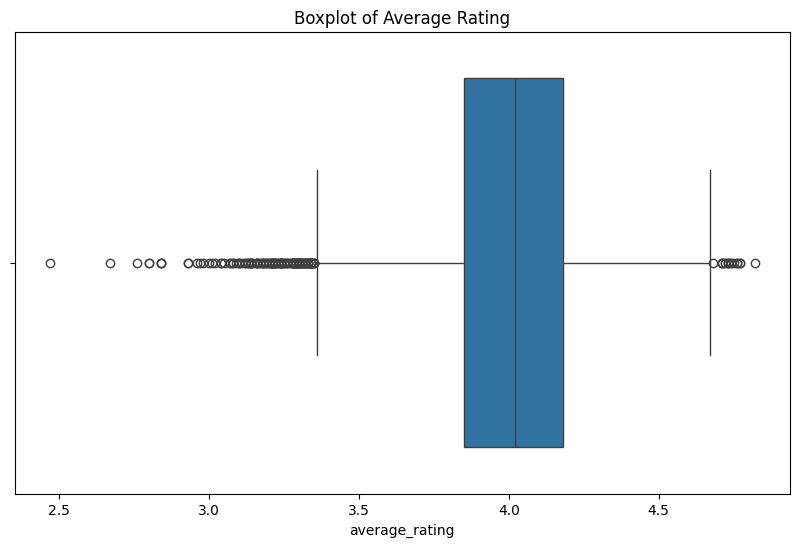

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='average_rating', data=books)
plt.title('Boxplot of Average Rating')
plt.show()

## **Rating.csv**

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [13]:
ratings.duplicated().sum()

1644

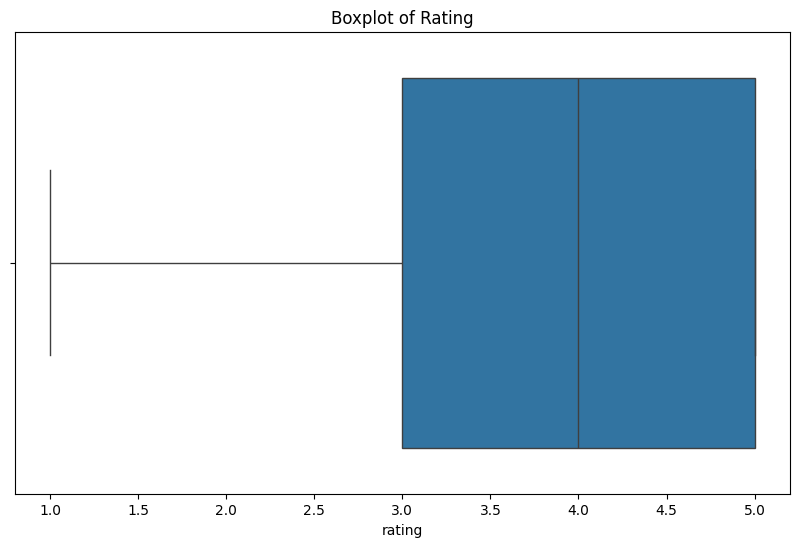

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=ratings)
plt.title('Boxplot of Rating')
plt.show()

## **Tags.csv**

In [15]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [16]:
tags.duplicated().sum()

0

## **Book_tags.csv**

In [17]:
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [18]:
book_tags.duplicated().sum()

6

**Analisa**

Pada data **books** tidak ditemukan adanya duplicate data, kemudian terdapat kolom yang tidak akan digunakan pada sistem rekomendasi yaitu kolom:
*   **id**
*   **best_book_id**
*   **isbn**
*   **isbn13**
*   **work_id**
*   **books_count**
*   **ratings_count**
*   **work_ratings_count**
*   **work_text_reviews_count**
*   **ratings_1**
*   **ratings_2**
*   **ratings_3**
*   **ratings_4**
*   **ratings_5**
*   **image_url**
*   **small_image_url**

ditemukan missing value dikolom:

*   isbn = 700 data
*   isbn13 = 585 data
*   original_publication_year = 21 data
*   original_title = 585 data
*   language_code = 1084 data

Pada data **books** ditemukan adanya **outlier** pada kolom average_rating, dimana ditemukan adanya nilai dibawah batas minimal (3.4) dan nilai diatas batas maksimal (4.5)

Pada data **ratings** tidak ditemukan missing value,sebaran data rating cenderung skewness kiri yang berarti sebagian besar pengguna memberi rating film 4 - 5, dan hanya sedikit yang memberi rating < 3, dan data ratings memiliki duplicated data

Pada data **tags** tidak ditemukan adanya data missing value dan duplicated

Sedangkan pada data **book_tags** ditemukan adanya data duplicated sebanyak 6 data, ditemukan juga nama kolom yang tidak konsisten untuk digabung berdasarkan book_id yang sama, dan terdapat kolom yang tidak akan digunakan yaitu kolom count

# **Data Preparation**

## **Handle Missing Value & Duplicated**

### **Books.csv**

In [19]:
books.duplicated().sum()

0

In [20]:
books.dropna(axis=0, how='any', inplace=True)

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7860 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7860 non-null   int64  
 1   book_id                    7860 non-null   int64  
 2   best_book_id               7860 non-null   int64  
 3   work_id                    7860 non-null   int64  
 4   books_count                7860 non-null   int64  
 5   isbn                       7860 non-null   object 
 6   isbn13                     7860 non-null   float64
 7   authors                    7860 non-null   object 
 8   original_publication_year  7860 non-null   float64
 9   original_title             7860 non-null   object 
 10  title                      7860 non-null   object 
 11  language_code              7860 non-null   object 
 12  average_rating             7860 non-null   float64
 13  ratings_count              7860 non-null   int64  
 1

**Analisa**

Setelah dilakukan penghapusan data missing value pada data books, data yang asalnya 10K -> 7860 data

### **Ratings.csv**

In [22]:
ratings.drop_duplicates(keep='first', inplace=True)

In [23]:
ratings.duplicated().sum()

0

**Analisa**

Pada data ratings dilakukan penghapusan terhadap 1644 data duplikat, dan menyimpan data pertama yang ditemukan

### **Book_tags.csv**

In [24]:
book_tags.duplicated().sum()

6

In [25]:
book_tags.drop_duplicates(keep='first', inplace=True)

**Analisa**

Dilakukan penghapusan 6 data duplikat pada data book_tags, dan menyimpan data pertama yang ditemukan

## **Rename Columns**

In [26]:
book_tags = book_tags.rename(columns={'goodreads_book_id': 'book_id'})

In [27]:
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999906 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  999906 non-null  int64
 1   tag_id   999906 non-null  int64
 2   count    999906 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB


**Analisa**

Pada kolom **goodreads_book_id** dilakukan perubahan nama kolom menjadi **book_id** agar mudah digabungkan dengan table lain.

## **Outlier Handling**

Melakukan handling value pada data books kolom average rating

In [31]:
Q1 = books['average_rating'].quantile(0.25)
Q3 = books['average_rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

books['average_rating'] = np.where(books['average_rating'] < lower_bound, lower_bound, books['average_rating'])
books['average_rating'] = np.where(books['average_rating'] > upper_bound, upper_bound, books['average_rating'])

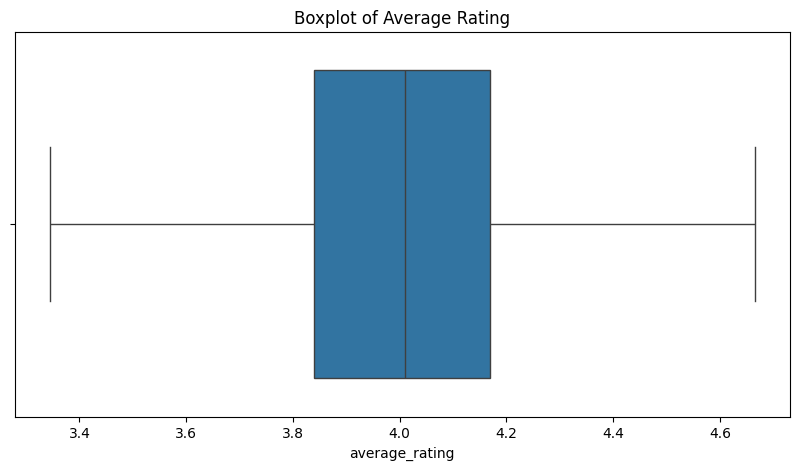

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='average_rating', data=books)
plt.title('Boxplot of Average Rating')
plt.show()

**Analisa**

Nilai average_rating diturunkan ke batas minimum dan maksimal menggunakan teknik capping, sekarang batas minimum menjadi sekitar 3.35 dan batas maksimal 4.6

## **Data Integration**

In [33]:
book_tags = pd.merge(book_tags, tags, on='tag_id', how='inner')
books = pd.merge(books, ratings, on='book_id', how='inner')
books = pd.merge(books, book_tags, on='book_id', how='inner')

In [34]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637000 entries, 0 to 6636999
Data columns (total 28 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   book_id                    int64  
 2   best_book_id               int64  
 3   work_id                    int64  
 4   books_count                int64  
 5   isbn                       object 
 6   isbn13                     float64
 7   authors                    object 
 8   original_publication_year  float64
 9   original_title             object 
 10  title                      object 
 11  language_code              object 
 12  average_rating             float64
 13  ratings_count              int64  
 14  work_ratings_count         int64  
 15  work_text_reviews_count    int64  
 16  ratings_1                  int64  
 17  ratings_2                  int64  
 18  ratings_3                  int64  
 19  ratings_4                  int64  
 20  ra

**Analisa**

Dilakukan penggabungan data menjadi satu untuk menambah metadata yang dimiliki buku dan mendapatkan informasi history user berdasarkan rating

## **Drop Columns**

In [35]:
books = books.drop(columns=['id', 'best_book_id', 'isbn', 'isbn13',
                            'image_url', 'work_id', 'small_image_url', 'original_title',
                            'books_count', 'ratings_count', 'work_ratings_count',
                            'work_text_reviews_count', 'ratings_1', 'ratings_2',
                            'ratings_3', 'ratings_4', 'ratings_5', 'tag_id','count'], axis=1)

In [36]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637000 entries, 0 to 6636999
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   book_id                    int64  
 1   authors                    object 
 2   original_publication_year  float64
 3   title                      object 
 4   language_code              object 
 5   average_rating             float64
 6   user_id                    int64  
 7   rating                     int64  
 8   tag_name                   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 455.7+ MB


In [37]:
books.duplicated().sum()

100

In [38]:
books.drop_duplicates(keep='first', inplace=True)

**Analisa**

Dilakukan penghapusan pada kolom yang tidak digunakan pada sistem rekomendasi, dan melakukan penghapusan 100 data duplikat setelah dilakukan penggabungan

# **Modelling**

## **Splitting Dataset**

In [40]:
# Ambil kolom untuk surprise
ratings_data = books[['user_id', 'book_id', 'rating']]

# Setup Reader
reader = Reader(rating_scale=(0.0, 5.0))
data = Dataset.load_from_df(ratings_data, reader)

# Split data
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## **Collaborative Filtering**

In [41]:
def precision_recall_ndcg_at_k(predictions, k=10, threshold=4.0):
    top_n = get_top_n(predictions, n=k)

    precisions = []
    recalls = []
    ndcgs = []

    # Buat dictionary dari ground truth (rating aktual)
    truth = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if true_r >= threshold:
            truth[uid].append(iid)

    for uid, user_predicted in top_n.items():
        pred_iids = [iid for iid, _ in user_predicted]
        true_iids = truth.get(uid, [])

        # Precision@K
        n_relevant = len(set(pred_iids) & set(true_iids))
        precisions.append(n_relevant / k)

        # Recall@K
        if true_iids:
            recalls.append(n_relevant / len(true_iids))
        else:
            recalls.append(0)

        # NDCG@K
        dcg = 0.0
        idcg = 0.0
        for i, iid in enumerate(pred_iids):
            if iid in true_iids:
                dcg += 1 / np.log2(i + 2)
        for i in range(min(len(true_iids), k)):
            idcg += 1 / np.log2(i + 2)
        ndcg = dcg / idcg if idcg > 0 else 0
        ndcgs.append(ndcg)

    print(f"Precision@{k}: {np.mean(precisions):.4f}")
    print(f"Recall@{k}: {np.mean(recalls):.4f}")
    print(f"NDCG@{k}: {np.mean(ndcgs):.4f}")

In [42]:
# Train model SVD
model = SVD()
model.fit(trainset)

# Evaluate
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.1243
RMSE: 0.12425580879020869


In [43]:
# Fungsi: Ambil Top-N item unik dari prediksi
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        # Hindari duplikat item
        if iid not in [item[0] for item in top_n[uid]]:
            top_n[uid].append((iid, est))
    # Urutkan prediksi dari yang tertinggi, lalu ambil Top-N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [44]:
# Jalankan evaluasi
precision_recall_ndcg_at_k(predictions, k=5, threshold=4.0)

Precision@5: 0.3068
Recall@5: 0.0400
NDCG@5: 0.4053


In [54]:
# Minta input user ID
target_user_id = int(input("Masukkan user ID: "))

# Ambil top-N rekomendasi
top_n = get_top_n(predictions, n=5)

# Tampilkan hanya untuk user ID yang diminta
if target_user_id in top_n:
    print(f"\nTop-5 Rekomendasi Buku untuk User {target_user_id}:")
    for (iid, est_rating) in top_n[target_user_id]:
        title = books.loc[books['book_id'] == iid, 'title'].values
        title_str = title[0] if len(title) > 0 else 'Unknown Title'
        print(f"  {title_str} (Predicted Rating: {est_rating:.2f})")
else:
    print(f"\nTidak ada rekomendasi untuk User ID {target_user_id}.")

Masukkan user ID: 1185

Top-5 Rekomendasi Buku untuk User 1185:
  Dune Messiah (Dune Chronicles #2) (Predicted Rating: 4.97)
  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings (Predicted Rating: 4.02)
  One Hundred Years of Solitude (Predicted Rating: 4.00)
  The Phantom Tollbooth (Predicted Rating: 3.98)
  Atlas Shrugged (Predicted Rating: 3.96)
